In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:40:42 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'LTC'

In [5]:
def ltc_block_supply_curve():
    out = [
        # Block num,
        # Total supply,
    ]
    inflation_change_blocks=840960
    inflation_change_frac=0.5
    y = 0
    block = 0
    while True:
        block += 1
        num_changes = int(
            (block - 1) / inflation_change_blocks
        )
        if num_changes > 32:
            break
        block_reward = 50 * (
            inflation_change_frac ** num_changes
        )
        if (block - 1) % inflation_change_blocks == 0:
            print(
                f'Inflation change #{num_changes}, '
                f'block reward = {block_reward}'
            )
        y += block_reward
        out.append([block, y])

    return out

In [6]:
start_date = datetime.date(2011, 10, 7)
block_time = datetime.timedelta(seconds=60 * 2.5)

block_supply = ltc_block_supply_curve()

supply = cmb.datetime_supply_curve(
    start_date=start_date,
    block_time=block_time,
    block_supply=block_supply,
)

Inflation change #0, block reward = 50.0
Inflation change #1, block reward = 25.0
Inflation change #2, block reward = 12.5
Inflation change #3, block reward = 6.25
Inflation change #4, block reward = 3.125
Inflation change #5, block reward = 1.5625
Inflation change #6, block reward = 0.78125
Inflation change #7, block reward = 0.390625
Inflation change #8, block reward = 0.1953125
Inflation change #9, block reward = 0.09765625
Inflation change #10, block reward = 0.048828125
Inflation change #11, block reward = 0.0244140625
Inflation change #12, block reward = 0.01220703125
Inflation change #13, block reward = 0.006103515625
Inflation change #14, block reward = 0.0030517578125
Inflation change #15, block reward = 0.00152587890625
Inflation change #16, block reward = 0.000762939453125
Inflation change #17, block reward = 0.0003814697265625
Inflation change #18, block reward = 0.00019073486328125
Inflation change #19, block reward = 9.5367431640625e-05
Inflation change #20, block reward 

,block,total_supply,total_supply_pct,date
0,1,50.0,0.000059,2011-10-07 00:00:00
1,2,100.0,0.000119,2011-10-07 00:02:30
2,3,150.0,0.000178,2011-10-07 00:05:00
3,4,200.0,0.000238,2011-10-07 00:07:30
4,5,250.0,0.000297,2011-10-07 00:10:00


,block,total_supply,total_supply_pct,date
27751675,27751676,8.409600e+07,100.0,2143-09-04 23:47:30
27751676,27751677,8.409600e+07,100.0,2143-09-04 23:50:00
27751677,27751678,8.409600e+07,100.0,2143-09-04 23:52:30
27751678,27751679,8.409600e+07,100.0,2143-09-04 23:55:00
27751679,27751680,8.409600e+07,100.0,2143-09-04 23:57:30


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

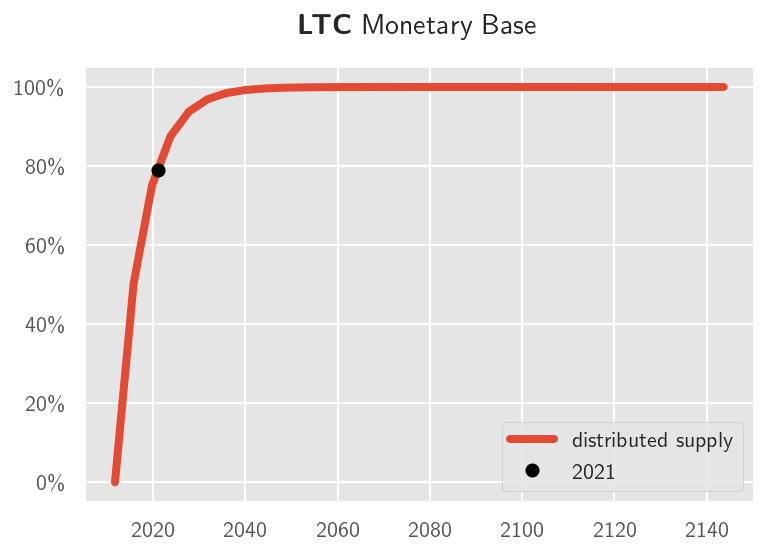

In [7]:
display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'LTC',
);

## Standardize Time Series

In [8]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 6884 lines to file ../output-data/LTC_weekly.csv


,coin,block,total_supply,total_supply_pct,date
0,LTC,1,50.0,0.000059,2011-10-01
1,LTC,1729,86450.0,0.102799,2011-10-01
2,LTC,5761,288050.0,0.342525,2011-10-01
3,LTC,9793,489650.0,0.582251,2011-10-01
4,LTC,13825,691250.0,0.821977,2011-10-01


,coin,block,total_supply,total_supply_pct,date
6879,LTC,27733825,8.409600e+07,100.0,2143-08-01
6880,LTC,27737857,8.409600e+07,100.0,2143-08-01
6881,LTC,27741889,8.409600e+07,100.0,2143-08-01
6882,LTC,27745921,8.409600e+07,100.0,2143-08-01
6883,LTC,27749953,8.409600e+07,100.0,2143-09-01


In [9]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1584 lines to file ../output-data/LTC_monthly.csv


,coin,block,total_supply,total_supply_pct,date
0,LTC,1,50.0,0.000059,2011-10-01
1,LTC,14401,720050.0,0.856224,2011-11-01
2,LTC,31681,1584050.0,1.883621,2011-12-01
3,LTC,49537,2476850.0,2.945265,2012-01-01
4,LTC,67393,3369650.0,4.006909,2012-02-01


,coin,block,total_supply,total_supply_pct,date
1579,LTC,27678529,8.409600e+07,100.0,2143-05-01
1580,LTC,27696385,8.409600e+07,100.0,2143-06-01
1581,LTC,27713665,8.409600e+07,100.0,2143-07-01
1582,LTC,27731521,8.409600e+07,100.0,2143-08-01
1583,LTC,27749377,8.409600e+07,100.0,2143-09-01


In [10]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 133 lines to file ../output-data/LTC_yearly.csv


,coin,block,total_supply,total_supply_pct,date
0,LTC,1,50.0,0.000059,2011-10-01
1,LTC,49537,2476850.0,2.945265,2012-01-01
2,LTC,260353,13017650.0,15.479512,2013-01-01
3,LTC,470593,23529650.0,27.979512,2014-01-01
4,LTC,680833,34041650.0,40.479512,2015-01-01


,coin,block,total_supply,total_supply_pct,date
128,LTC,26767873,8.409600e+07,100.0,2139-01-01
129,LTC,26978113,8.409600e+07,100.0,2140-01-01
130,LTC,27188929,8.409600e+07,100.0,2141-01-01
131,LTC,27399169,8.409600e+07,100.0,2142-01-01
132,LTC,27609409,8.409600e+07,100.0,2143-01-01
